In [9]:
import pandas as pd 

In [10]:
input_gender_data = pd.read_csv('gender_submission.csv')
input_gender_data.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


| 英語 | 日本語訳 |
|---|---|
| PassengerId | 乗客ID |
| Survived | 生存（1: 生存, 0: 死亡） |
| Pclass | 客室等級（1等, 2等, 3等） |
| Name | 名前 |
| Sex | 性別 |
| Age | 年齢 |
| SibSp | 同乗している兄弟・配偶者の数 |
| Parch | 同乗している親・子供の数 |
| Ticket | チケット番号 |
| Fare | 運賃 |
| Cabin | 客室番号 |
| Embarked | 乗船港（C: シェルブール, Q: クイーンズタウン, S: サウサンプトン） |


In [11]:
input_train_data = pd.read_csv('train.csv')
input_train_data#.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


以下のテストデータの生存を予測できるようにする

In [12]:
input_test_data = pd.read_csv('test.csv')
#input_test_data

データの揺れ(型)を確認する

In [13]:
input_train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

以下のコードでデータの欠損の個数を確認する

In [14]:
input_train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

ここからでは欠損値の補完を目的とする

データの詳細を確認する（数区分）

In [15]:
input_train_data.groupby("Pclass").count()["PassengerId"]

Pclass
1    216
2    184
3    491
Name: PassengerId, dtype: int64

In [16]:
input_train_data["Sex"].unique()

array(['male', 'female'], dtype=object)

In [17]:
#データが多すぎて見えない
#print(input_train_data["Embarked"].where(input_train_data["Embarked"].isnull()))

In [18]:
#NaNがある行を特定
print(input_train_data.loc[input_train_data["Embarked"].isnull()])

     PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked  
61   female  38.0      0      0  113572  80.0   B28      NaN  
829  female  62.0      0      0  113572  80.0   B28      NaN  


"ロジテック回帰を使うためのデータの準備をする"

In [19]:
#Sexのデータをone-hotで書くことにより0<1と機械が誤解するのを防ぐ 特徴量が増えるのがデメリット
input_train_data = pd.get_dummies(input_train_data,columns=["Sex"],drop_first=False)
#以下のコードでTureとFalseを0,1に変換
input_train_data["Sex_female"] = input_train_data["Sex_female"].astype(int)
input_train_data["Sex_male"] = input_train_data["Sex_male"].astype(int)
input_train_data.head()

#こう書いても良いが元データに影響を与える
#エラーが出るようになったためここで直接データを生成する

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,0,1


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#Embarkedが欠損していないデータを使う
df_notna = input_train_data.dropna(subset=["Embarked"])

#予測に使う特徴量 #Ageは欠損があるから使えない
features = ['Fare','Pclass','Sex_female','Sex_male']
X = df_notna[features]
y = df_notna["Embarked"]

#X = pd.get_dummies(X,columns=['Sex'],drop_first=True) #SexをOne-Hot

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

訓練と予測

In [21]:
#ロジスッティク回帰モデルのインスタンス化
#デフォルトは100だが収束しないエラーが出たため
model = LogisticRegression(max_iter=500)

#訓練データを使ってモデルを学習
model.fit(X_train,y_train)

#テストデータを使って予測
y_pred = model.predict(X_test)

モデルの評価

In [22]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test,y_pred)
print(f'Accuracy:{accuracy:.4f}')

Accuracy:0.7360


73%の確率で正しく予想できているが改善の余地あり

ランダムフォレスト

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#ランダムフォレストモデル
rf_model = RandomForestClassifier(n_estimators=100,random_state=42)
rf_model.fit(X_train,y_train)

#予測と結果の表示
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test,rf_predictions)
print(f"Random Forest Accuracy:{rf_accuracy:.4f}")

Random Forest Accuracy:0.8652


勾配ブースティング

In [24]:
from sklearn.ensemble import GradientBoostingClassifier

#勾配ブースティングモデル
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train,y_train)

#予測と評価
gb_predictions = gb_model.predict(X_test)
gb_accuracy = accuracy_score(y_test,gb_predictions)
print(f"Grandient Boosting Accuracy: {gb_accuracy:.4f}")

Grandient Boosting Accuracy: 0.8989


サポートベクターマシン（SVM）

In [25]:
from sklearn.svm import SVC

svm_model = SVC(random_state=42)
svm_model.fit(X_train,y_train)

svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test,svm_predictions)
print(f"SVM Accuracy: {svm_accuracy:.4f}")

SVM Accuracy: 0.7360


k近傍法(KNN)

In [26]:
from sklearn.neighbors import KNeighborsClassifier

#K近傍法モデル
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train)

#予測と評価
knn_predictions = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test,knn_predictions)
print(f"knn Accuracy: {knn_accuracy:.4f}")

knn Accuracy: 0.8146


実際にモデルを使ってNaNの値を予測する

In [27]:
print(input_train_data.loc[input_train_data["Embarked"].isnull()])

     PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

      Age  SibSp  Parch  Ticket  Fare Cabin Embarked  Sex_female  Sex_male  
61   38.0      0      0  113572  80.0   B28      NaN           1         0  
829  62.0      0      0  113572  80.0   B28      NaN           1         0  


In [28]:
#2回目はデータが既に保管された状態になるのでエラーになる
# Embarked が NaN のデータを抽出
df_nan = input_train_data[input_train_data["Embarked"].isnull()].copy()

# 特徴量の前処理（学習時と同じ）
df_nan_X = df_nan[["Fare", "Pclass", "Sex_female","Sex_male"]]
#以下のコードはone-hotをSexに適応するために記述
#df_nan_X = pd.get_dummies(df_nan_X, columns=["Fare"], drop_first=True)

# Embarked を予測
predicted_embarked = gb_model.predict(df_nan_X)

# 予測結果を適用
df_nan["Embarked"] = predicted_embarked

# 元のデータに埋め戻す
input_train_data.loc[df_nan.index, "Embarked"] = df_nan["Embarked"]

NaNが消えたかの確認

In [29]:
input_train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Sex_female       0
Sex_male         0
dtype: int64

以下のコードで欠損データがどう置き換わったか確認できた

In [30]:
row_61 = input_train_data['Embarked'].iloc[61]
row_829 = input_train_data['Embarked'].iloc[829]
print(row_61)
print(row_829)

S
S


# ここからは"Age"の欠損値を求める

### 名前から特徴量を作る準備をする

In [31]:
# Name列からタイトルを抽出
input_train_data['Title'] = input_train_data['Name'].str.extract(r',\s*([^\.]+)\.')

# 稀なタイトルを統合
rare_titles = ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 
               'Jonkheer', 'Dona', 'Mlle', 'Mme', 'Ms', 'the Countess']
input_train_data['Title'] = input_train_data['Title'].replace(rare_titles, 'Rare')

# 結果を確認
print(input_train_data[['Name', 'Title']].head())
print(input_train_data['Title'].value_counts())

                                                Name Title
0                            Braund, Mr. Owen Harris    Mr
1  Cumings, Mrs. John Bradley (Florence Briggs Th...   Mrs
2                             Heikkinen, Miss. Laina  Miss
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)   Mrs
4                           Allen, Mr. William Henry    Mr
Title
Mr        517
Miss      182
Mrs       125
Master     40
Rare       27
Name: count, dtype: int64


In [32]:
#ワンホット
input_train_data = pd.get_dummies(input_train_data, columns=['Title'], drop_first=True)
input_train_data['Title_Miss'] = input_train_data['Title_Miss'].astype(int)
input_train_data['Title_Mr'] = input_train_data['Title_Mr'].astype(int)
input_train_data['Title_Mrs'] = input_train_data['Title_Mrs'].astype(int)
input_train_data['Title_Rare'] = input_train_data['Title_Rare'].astype(int)

## Fareと家族構成の新しい列を作る

#### fareと家族構成を結び作るためにまずは関係がありそうか確認する

           mean  std
LastName            
Abbing     7.55  NaN
Abbott    20.25  0.0
Abelson   24.00  0.0
Adahl      7.25  NaN
Adams      8.05  NaN
                  mean  std
LastName                   
Abbott           20.25  0.0
Abelson          24.00  0.0
Ali               7.05  0.0
Allison         151.55  0.0
Arnold-Franchi   17.80  0.0


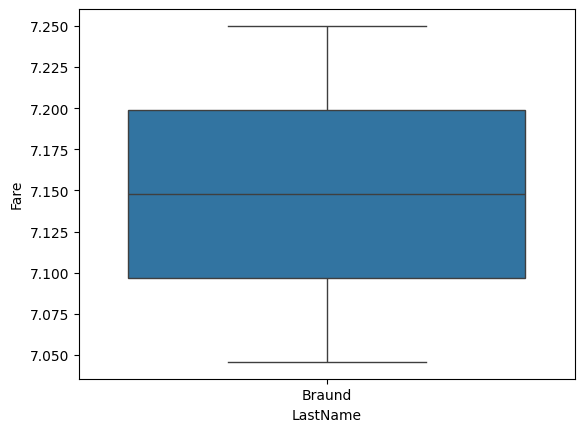

In [33]:
# 姓（LastName）を抽出して新しい列に保存
input_train_data['LastName'] = input_train_data['Name'].str.split(',').str[0]

# 姓ごとの運賃（Fare）の平均と標準偏差を計算
fare_by_lastname = input_train_data.groupby('LastName')['Fare'].agg(['mean', 'std'])

# 平均運賃と標準偏差を表示
print(fare_by_lastname.head())

# 標準偏差が小さい姓をピックアップ（運賃が同じに近い）
same_fare_lastnames = fare_by_lastname[fare_by_lastname['std'] < 10]  # 10の基準は調整可能
print(same_fare_lastnames.head())

# 同じ姓を持つ乗客に絞って運賃の分布を確認
import seaborn as sns
import matplotlib.pyplot as plt

# 例えば「Braund」という姓の乗客の運賃分布
sns.boxplot(x='LastName', y='Fare', data=input_train_data[input_train_data['LastName'] == 'Braund'])
plt.show()


以上の結果から標準偏差が0なところから料金は家族ごとに同じことが確認された

以下のコードから全ての姓が標準偏差が0かを確認する

In [34]:
#各姓ごとの運賃の平均と標準偏差を計算
fare_stats = input_train_data.groupby('LastName')['Fare'].agg(['std'])
print(fare_stats)

               std
LastName          
Abbing         NaN
Abbott         0.0
Abelson        0.0
Adahl          NaN
Adams          NaN
...            ...
de Mulder      NaN
de Pelsmaeker  NaN
del Carlo      NaN
van Billiard   NaN
van Melkebeke  NaN

[667 rows x 1 columns]


### 料金と家族人数の列の追加

In [35]:
#家族人数の合計
input_train_data['FamilySize'] = input_train_data['SibSp'] + input_train_data['Parch'] + 1

#家族人数と運賃の比率
input_train_data['FarePerFamilyMember'] = input_train_data['Fare'] / input_train_data['FamilySize']

input_train_data['FarePerFamilyMember'].head()

0     3.62500
1    35.64165
2     7.92500
3    26.55000
4     8.05000
Name: FarePerFamilyMember, dtype: float64

# データ準備

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#Ageが欠損していないデータを使う
df_notna = input_train_data.dropna(subset=["Age"])

#予測に使う特徴量 #Ageを予測するモデルだから使っては行けない
features = ['Pclass','SibSp',"Parch",'Title_Miss','Title_Mr','Title_Mrs','Title_Rare','FamilySize','FarePerFamilyMember']
X = df_notna[features]
y = df_notna["Age"]

#Embarkedをone-hotエンコードする
#X = pd.get_dummies(X,columns=["Embarked"],drop_first=True)
#X["Embarked_Q"] = X["Embarked_Q"].astype(int)
#X["Embarked_S"] = X["Embarked_S"].astype(int)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

スケーリング

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [38]:
input_train_data.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,LastName,FamilySize,FarePerFamilyMember
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,0,1,0,1,0,0,Braund,2,3.62500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,0,1,0,Cumings,2,35.64165
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,1,0,0,0,Heikkinen,1,7.92500
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1,0,0,0,1,0,Futrelle,2,26.55000
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,0,1,0,1,0,0,Allen,1,8.05000


In [39]:
#以下のコードを実行するとCの列も必要に感じられるがCを基準として作成されるため必要ない
#input_train_data.groupby("Embarked").count()["PassengerId"]
print(X.head())

   Pclass  SibSp  Parch  Title_Miss  Title_Mr  Title_Mrs  Title_Rare  \
0       3      1      0           0         1          0           0   
1       1      1      0           0         0          1           0   
2       3      0      0           1         0          0           0   
3       1      1      0           0         0          1           0   
4       3      0      0           0         1          0           0   

   FamilySize  FarePerFamilyMember  
0           2              3.62500  
1           2             35.64165  
2           1              7.92500  
3           2             26.55000  
4           1              8.05000  


年齢の最大の値

In [40]:
input_train_data['Age'].max()

np.float64(80.0)

リッジ回帰モデル

In [41]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# リッジ回帰モデルを作成
ridge_model = Ridge(alpha=1.0)  # alphaは正則化の強さを指定
ridge_model.fit(X_train, y_train)

# 予測
y_pred = ridge_model.predict(X_test)

# 評価指標を計算
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²スコア: {r2}")


MAE: 8.390219319671194
MSE: 106.63044400322269
RMSE: 10.326201818830711
R²スコア: 0.42487579243700835


線形回帰

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

# モデルの予測値
y_pred = lr_model.predict(X_test)

# MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae}")

# MSE
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")

# RMSE
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")

# R2スコア
r2 = r2_score(y_test, y_pred)
print(f"R²スコア: {r2}")

MAE: 8.400264040359854
MSE: 106.85227976791215
RMSE: 10.336937639741867
R²スコア: 0.4236792943864863


### 勾配ブースティング回帰モデル

In [43]:
#### 非正負の値でモデルの作成
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# モデルの作成
gb_lr_model = HistGradientBoostingRegressor(max_iter=50,learning_rate=0.10,max_depth=11)# モデルの学習
gb_lr_model.fit(X_train, y_train)

# モデルの予測値
y_pred = gb_lr_model.predict(X_test)

# 非負制約の確認
y_pred = np.clip(y_pred, 0, None)  # 必要に応じて負の値を0に制約（HistGradientBoostingRegressorでは通常不要）

# 評価指標の計算
# MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae}")

# MSE
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")

# RMSE
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")

# R²スコア
r2 = r2_score(y_test, y_pred)
print(f"R²スコア: {r2}")



MAE: 7.746470152346647
MSE: 94.3079310866954
RMSE: 9.711227063903685
R²スコア: 0.49133875751749045


ランダムフォレスト回帰

In [44]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f"R²スコア: {r2}")


R²スコア: 0.3770405100918247


勾配ブースティング回帰

In [45]:
from xgboost import XGBRegressor

gb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)
y_pred = gb_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f"R²スコア: {r2}")

R²スコア: 0.38846187943045407


深層学習（MLP）

In [46]:
from sklearn.neural_network import MLPRegressor #random_state=42

ml_model = MLPRegressor(hidden_layer_sizes=(64,32),max_iter=2500,alpha=0.005,random_state=42)
ml_model.fit(X_train,y_train)
y_pred = ml_model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# モデルの予測値
y_pred = ml_model.predict(X_test)

# MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae}")

# MSE
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")

# RMSE
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")

# R2スコア
r2 = r2_score(y_test, y_pred)
print(f"R²スコア: {r2}")

MAE: 7.769925940977583
MSE: 94.8672075867536
RMSE: 9.739979855562002
R²スコア: 0.4883222320128714


In [47]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# モデルの設定
ml_model2 = MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=3000, alpha=0.05, random_state=42)
ml_model2.fit(X_train, y_train)

# 予測
y_pred = ml_model2.predict(X_test)

# 予測値を 0 以上 80 未満に制限
y_pred = np.clip(y_pred, 0, 80)

# MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae}")

# MSE
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")

# RMSE
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")

# R2スコア
r2 = r2_score(y_test, y_pred)
print(f"R²スコア: {r2}")


MAE: 7.968195852318007
MSE: 97.99787136903767
RMSE: 9.899387423928697
R²スコア: 0.4714366179299191


In [48]:
input_train_data['Age'].isnull().sum()

np.int64(177)

### モデルの選定

r**2の平均的な値を習得

In [49]:
from sklearn.model_selection import cross_val_score

#ml_model gb_lr_model ml_model2

# 交差検証の実行
cv_scores = cross_val_score(ml_model2, X, y, cv=10, scoring='r2')
print(f"Cross-validation R² scores: {cv_scores}")
print(f"Average R²: {cv_scores.mean()}")


Cross-validation R² scores: [0.53872042 0.41938815 0.52982172 0.23847972 0.33806843 0.45338412
 0.25243359 0.43272801 0.39850782 0.39901673]
Average R²: 0.4000548704651252


過学習の確認

In [50]:
# 学習データでの r²
r2_train = ml_model2.score(X_train, y_train)
print(f"Train R²: {r2_train}")

# テストデータでの r²
r2_test = ml_model2.score(X_test, y_test)
print(f"Test R²: {r2_test}")

Train R²: 0.5527343004875346
Test R²: 0.4713295285199638


### モデルを適応して'Age'の欠損値を埋める

In [51]:
import pandas as pd
import numpy as np
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 入力データ (仮に input_train_data が既に定義されていると仮定)
# input_train_data = ...

# 欠損値がないデータを使って学習
df_notna = input_train_data.dropna(subset=["Age"])

# 特徴量の選択
features = ['Pclass','SibSp',"Parch",'Title_Miss','Title_Mr',
            'Title_Mrs','Title_Rare','FamilySize','FarePerFamilyMember']

# Embarked を One-Hot エンコード
#df_notna = pd.get_dummies(df_notna, columns=["Embarked"], drop_first=True)

# 学習データとターゲット
X = df_notna[features]
y = df_notna["Age"]

'''
# 学習データを分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# モデルの学習
gb_lr_model = HistGradientBoostingRegressor()
gb_lr_model.fit(X_train, y_train)

# モデルの評価
y_pred = gb_lr_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
r2 = r2_score(y_test, y_pred)
print(f"R²スコア: {r2}")

'''

# Age が NaN のデータを抽出
df_nan = input_train_data[input_train_data["Age"].isnull()].copy()

# Embarked を One-Hot エンコード
#df_nan = pd.get_dummies(df_nan, columns=["Embarked"], drop_first=True)

# 欠けている列を補完（学習時の特徴量をすべて揃える）
for col in features:
    if col not in df_nan.columns:
        df_nan[col] = 0


# 特徴量の準備
df_nan_X = df_nan[features]

# Age を予測
predicted_age = ml_model2.predict(df_nan_X)

# 予測結果を適用
df_nan["Age"] = predicted_age

# 元のデータに埋め戻す
input_train_data.loc[df_nan.index, "Age"] = df_nan["Age"]

# 結果確認
#print(input_train_data.isnull().sum())

/opt/homebrew/var/pyenv/versions/3.12.6/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(


In [52]:
#結果の表示
input_train_data['Age'].isnull().sum()

np.int64(0)

In [53]:
input_train_data

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,LastName,FamilySize,FarePerFamilyMember
0,1,0,3,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,NaN,S,0,1,0,1,0,0,Braund,2,3.62500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,71.2833,C85,C,1,0,0,0,1,0,Cumings,2,35.64165
2,3,1,3,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,1,0,0,0,Heikkinen,1,7.92500
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,C123,S,1,0,0,0,1,0,Futrelle,2,26.55000
4,5,0,3,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,NaN,S,0,1,0,1,0,0,Allen,1,8.05000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.000000,0,0,211536,13.0000,NaN,S,0,1,0,0,0,1,Montvila,1,13.00000
887,888,1,1,"Graham, Miss. Margaret Edith",19.000000,0,0,112053,30.0000,B42,S,1,0,1,0,0,0,Graham,1,30.00000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",24.796359,1,2,W./C. 6607,23.4500,NaN,S,1,0,1,0,0,0,Johnston,4,5.86250
889,890,1,1,"Behr, Mr. Karl Howell",26.000000,0,0,111369,30.0000,C148,C,0,1,0,1,0,0,Behr,1,30.00000


In [54]:
if (input_train_data['Age']<0).any():
    print("Ageにマイナスの値が含まれています．")
else:
    print('Ageにマイナスの値は含まれていません')

Ageにマイナスの値は含まれていません


In [55]:
negative_ages = input_train_data[input_train_data['Age'] < 0 ]
print(negative_ages)

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked, Sex_female, Sex_male, Title_Miss, Title_Mr, Title_Mrs, Title_Rare, LastName, FamilySize, FarePerFamilyMember]
Index: []


In [56]:
input_train_data.isnull().sum()

PassengerId              0
Survived                 0
Pclass                   0
Name                     0
Age                      0
SibSp                    0
Parch                    0
Ticket                   0
Fare                     0
Cabin                  687
Embarked                 0
Sex_female               0
Sex_male                 0
Title_Miss               0
Title_Mr                 0
Title_Mrs                0
Title_Rare               0
LastName                 0
FamilySize               0
FarePerFamilyMember      0
dtype: int64

# LastNameの欠損値を調べる

In [63]:
#列の値の出現数をカウント
duplicate_counts = input_train_data['LastName'].value_counts()

#被りのある列だけを抽出
duplicate_only = duplicate_counts[duplicate_counts > 1]

#被りのある列の個数
num_duplicates = len(duplicate_only)

print("被りのある値の個数：",num_duplicates)
print('被りの詳細：')
print(duplicate_only)

被りのある値の個数： 133
被りの詳細：
LastName
Andersson    9
Sage         7
Panula       6
Skoog        6
Carter       6
            ..
Hocking      2
Kantor       2
Petroff      2
Johnston     2
Dean         2
Name: count, Length: 133, dtype: int64


In [76]:
smith_rows = input_train_data[input_train_data['LastName']=='Panula']
smith_rows

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,LastName,FamilySize,FarePerFamilyMember
50,51,0,3,"Panula, Master. Juha Niilo",7.0,4,1,3101295,39.6875,NaN,S,0,1,0,0,0,0,Panula,6,6.614583
164,165,0,3,"Panula, Master. Eino Viljami",1.0,4,1,3101295,39.6875,NaN,S,0,1,0,0,0,0,Panula,6,6.614583
266,267,0,3,"Panula, Mr. Ernesti Arvid",16.0,4,1,3101295,39.6875,NaN,S,0,1,0,1,0,0,Panula,6,6.614583
638,639,0,3,"Panula, Mrs. Juha (Maria Emilia Ojala)",41.0,0,5,3101295,39.6875,NaN,S,1,0,0,0,1,0,Panula,6,6.614583
686,687,0,3,"Panula, Mr. Jaako Arnold",14.0,4,1,3101295,39.6875,NaN,S,0,1,0,1,0,0,Panula,6,6.614583
824,825,0,3,"Panula, Master. Urho Abraham",2.0,4,1,3101295,39.6875,NaN,S,0,1,0,0,0,0,Panula,6,6.614583


調べたがイマイチわからなく80％欠損値なためこの列は使用しない

# Surviesdの予想モデルを作成する

### モデルの準備

In [174]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#Surviedが欠損していないデータを使う
df_notna = input_train_data.dropna(subset=["Survived"])

#予測に使う特徴量 #Surviedを予測するモデルだから使っては行けない
#features = ['Pclass','Age','Title_Miss','Title_Mr','Title_Mrs','Title_Rare','FamilySize']
features = ['Pclass','Age']
X = df_notna[features]
y = df_notna["Survived"]

#Embarkedをone-hotエンコードする
#X = pd.get_dummies(X,columns=["Embarked"],drop_first=True)
#X["Embarked_Q"] = X["Embarked_Q"].astype(int)
#X["Embarked_S"] = X["Embarked_S"].astype(int)
#X["Sex_female"] = X["Sex_female"].astype(int)
#X["Sex_male"] = X["Sex_male"].astype(int)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### スケーリング

In [175]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### モデルの選定

リッジ回帰モデル

In [166]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# リッジ回帰モデルを作成
ridge_model = Ridge(alpha=1.0)  # alphaは正則化の強さを指定
ridge_model.fit(X_train, y_train)

# 予測
y_pred = ridge_model.predict(X_test)

# 評価指標を計算
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
#r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
#print(f"R²スコア: {r2}")

# 学習データでの r²
r2_train = ridge_model.score(X_train, y_train)
print(f"Train R²: {r2_train}")
# テストデータでの r²
r2_test = ridge_model.score(X_test, y_test)
print(f"Test R²: {r2_test}")

MAE: 0.287683233315461
MSE: 0.13704238696082052
RMSE: 0.3701923648062187
Train R²: 0.41822760184931507
Test R²: 0.4348809368582174


線形回帰

In [167]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

# モデルの予測値
y_pred = lr_model.predict(X_test)
# MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae}")
# MSE
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")
# RMSE
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")

# 学習データでの r²
r2_train = lr_model.score(X_train, y_train)
print(f"Train R²: {r2_train}")
# テストデータでの r²
r2_test = lr_model.score(X_test, y_test)
print(f"Test R²: {r2_test}")

MAE: 0.2874331734150626
MSE: 0.13696044374930144
RMSE: 0.3700816717284192
Train R²: 0.41823364674641317
Test R²: 0.4352188445081895


勾配ブースティング回帰モデル

In [168]:
#### 非正負の値でモデルの作成
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# モデルの作成
gb_lr_model = HistGradientBoostingRegressor(max_iter=50,learning_rate=0.10,max_depth=11)# モデルの学習
gb_lr_model.fit(X_train, y_train)

# モデルの予測値
y_pred = gb_lr_model.predict(X_test)

# 非負制約の確認
y_pred = np.clip(y_pred, 0, None)  # 必要に応じて負の値を0に制約（HistGradientBoostingRegressorでは通常不要）

# 評価指標の計算
# MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae}")
# MSE
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")
# RMSE
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")
# R²スコア
r2 = r2_score(y_test, y_pred)
print(f"R²スコア: {r2}")

# 学習データでの r²
r2_train = gb_lr_model.score(X_train, y_train)
print(f"Train R²: {r2_train}")
# テストデータでの r²
r2_test = gb_lr_model.score(X_test, y_test)
print(f"Test R²: {r2_test}")

MAE: 0.2513054534588728
MSE: 0.12963636473084017
RMSE: 0.36005050302817265
R²スコア: 0.4654210087077414
Train R²: 0.5984630201995378
Test R²: 0.46467230009075144


ランダムフォレスト回帰

In [176]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f"R²スコア: {r2}")
# 学習データでの r²
r2_train = rf_model.score(X_train, y_train)
print(f"Train R²: {r2_train}")
# テストデータでの r²
r2_test = rf_model.score(X_test, y_test)
print(f"Test R²: {r2_test}")

R²スコア: 0.15591379236917136
Train R²: 0.4699858070543922
Test R²: 0.15591379236917136


深層学習モデル

In [172]:
from sklearn.neural_network import MLPRegressor #random_state=42
#hidden_layer_sizes=(64,32),max_iter=2500,alpha=0.005,

ml_model = MLPRegressor(random_state=42)
ml_model.fit(X_train,y_train)
y_pred = ml_model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# モデルの予測値
y_pred = ml_model.predict(X_test)
# MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae}")
# MSE
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")
# RMSE
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")
# R2スコア
r2 = r2_score(y_test, y_pred)
print(f"R²スコア: {r2}")

# 学習データでの r²
r2_train = lr_model.score(X_train, y_train)
print(f"Train R²: {r2_train}")
# テストデータでの r²
r2_test = lr_model.score(X_test, y_test)
print(f"Test R²: {r2_test}")

MAE: 0.2769056895077279
MSE: 0.1367809421194464
RMSE: 0.3698390759768989
R²スコア: 0.4359590519370421
Train R²: 0.41823364674641317
Test R²: 0.4352188445081895


In [179]:
import pandas as pd
import numpy as np
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 入力データ (仮に input_train_data が既に定義されていると仮定)
# input_train_data = ...

# 欠損値がないデータを使って学習
df_notna = input_train_data.dropna(subset=["Survived"])

# 特徴量の選択
features = ['Pclass','Age']

# Embarked を One-Hot エンコード
#df_notna = pd.get_dummies(df_notna, columns=["Embarked"], drop_first=True)

# 学習データとターゲット
X = df_notna[features]
y = df_notna["Survived"]

'''
# 学習データを分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# モデルの学習
gb_lr_model = HistGradientBoostingRegressor()
gb_lr_model.fit(X_train, y_train)

# モデルの評価
y_pred = gb_lr_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
r2 = r2_score(y_test, y_pred)
print(f"R²スコア: {r2}")

'''

# Age が NaN のデータを抽出
df_nan = input_test_data[input_test_data["Survived"].isnull()].copy()

# Embarked を One-Hot エンコード
#df_nan = pd.get_dummies(df_nan, columns=["Embarked"], drop_first=True)

# 欠けている列を補完（学習時の特徴量をすべて揃える）
for col in features:
    if col not in df_nan.columns:
        df_nan[col] = 0


# 特徴量の準備
df_nan_X = df_nan[features]

# Age を予測
predicted_age = rf_model.predict(df_nan_X)

# 予測結果を適用
df_nan["Survived"] = predicted_age

# 元のデータに埋め戻す
input_train_data.loc[df_nan.index, "Survived"] = df_nan["Survived"]

# 結果確認
#print(input_train_data.isnull().sum())

KeyError: 'Survived'